In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9a923a7c25e0b38ac02b1341b663fed


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

codrington ag
ushuaia ar
burica pa
cape town za
ushuaia ar
rawson ar
mataura pf
thompson ca
rockhampton au
cape town za
patos de minas br
punta arenas cl
rikitea pf
hobart au
ribeira grande pt
minna ng
ushuaia ar
sitka us
ushuaia ar
hermanus za
albany au
broome au
ushuaia ar
barrow us
butaritari ki
nanortalik gl
bluff nz
port alfred za
punta arenas cl
tonneins fr
kodiak us
campo maior br
anadyr ru
taolanaro mg
mayor pablo lagerenza py
busselton au
castro cl
lompoc us
ushuaia ar
longyearbyen sj
tiznit ma
broken hill au
yellowknife ca
saint-georges gf
rikitea pf
taburbah tn
rodrigues alves br
hilo us
atuona pf
ushuaia ar
atambua id
new norfolk au
grand river south east mu
dunedin nz
abnub eg
tiksi ru
hilo us
bluff nz
nanortalik gl
temaraia ki
ferme-neuve ca
rio gallegos ar
tiksi ru
grand river south east mu
henties bay na
ushuaia ar
cananeia br
castlerea ie
hermanus za
kathmandu np
severo-kurilsk ru
busselton au
chokurdakh ru
port alfred za
vaini to
albany au
barrow us
sinnamary gf
nelso

rikitea pf
taolanaro mg
ta khmau kh
arraial do cabo br
cape town za
thompson ca
port alfred za
ushuaia ar
busselton au
busselton au
mouzakion gr
port alfred za
hobart au
leningradskiy ru
nabire id
bluff nz
nola cf
mrirt ma
oranjestad aw
cape town za
hobart au
louisbourg ca
half moon bay us
butaritari ki
port lincoln au
collie au
castro cl
cape town za
the valley ai
cidreira br
belushya guba ru
mar del plata ar
tocopilla cl
barentsburg sj
cape town za
barrow us
saint anthony ca
cape town za
coihaique cl
ushuaia ar
setermoen no
beruwala lk
thompson ca
kapaa us
hermanus za
hithadhoo mv
ponta do sol cv
fairbanks us
port alfred za
ponta do sol cv
canto do buriti br
vaini to
van buren us
kapit my
northam au
taolanaro mg
novovyazniki ru
busselton au
gravelbourg ca
vaini to
albany au
castro cl
kodiak us
geraldton au
jamestown sh
santiago de cao pe
ambilobe mg
ponta delgada pt
camacha pt
punta arenas cl
georgetown sh
yellowknife ca
grindavik is
avera pf
chapais ca
coquimbo cl
rikitea pf
carnarv

cape town za
rikitea pf
kamphaeng phet th
tuktoyaktuk ca
cherskiy ru
puerto ayora ec
northam gb
punta arenas cl
hobart au
lahat id
mocambique mz
vila franca do campo pt
puerto ayora ec
mys shmidta ru
ushuaia ar
albany au
taolanaro mg
ovalle cl
jamestown sh
ribeira brava cv
cape town za
mastic beach us
lagos pt
lopsmarka no
srednekolymsk ru
lebu cl
san cristobal ec
mataura pf
bani do
stulovo ru
bengkulu id
ushuaia ar
nizwa om
soyo ao
lompoc us
fairbanks us


In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 12 | codrington
Processing Record 2 of Set 12 | ushuaia
Processing Record 3 of Set 12 | burica
Processing Record 4 of Set 12 | cape town
Processing Record 5 of Set 12 | rawson
Processing Record 6 of Set 12 | mataura
Processing Record 7 of Set 12 | thompson
Processing Record 8 of Set 12 | rockhampton
Processing Record 9 of Set 12 | patos de minas
Processing Record 10 of Set 12 | punta arenas
Processing Record 11 of Set 12 | rikitea
Processing Record 12 of Set 12 | hobart
Processing Record 13 of Set 12 | ribeira grande
Processing Record 14 of Set 12 | minna
Processing Record 15 of Set 12 | sitka
Processing Record 16 of Set 12 | hermanus
Processing Record 17 of Set 12 | albany
Processing Record 18 of Set 12 | broome
Processing Record 19 of Set 12 | barrow
Processing Record 20 of Set 12 | butaritari
Processing Record 21 of Set 12 | nanortalik
Processing Record 22 of Set 12 | bluff
Processing Record 23 of Set 12 | port alfred
Processing Record 24 of Set 12 | tonne

Processing Record 1 of Set 16 | solnechnyy
Processing Record 2 of Set 16 | nantucket
Processing Record 3 of Set 16 | mar del plata
Processing Record 4 of Set 16 | neka
Processing Record 5 of Set 16 | kavaratti
Processing Record 6 of Set 16 | fort-shevchenko
Processing Record 7 of Set 16 | bredasdorp
Processing Record 8 of Set 16 | smolenka
Processing Record 9 of Set 16 | moerai
Processing Record 10 of Set 16 | qaqortoq
Processing Record 11 of Set 16 | aksu
Processing Record 12 of Set 16 | kailua
Processing Record 13 of Set 16 | marica
Processing Record 14 of Set 16 | mys shmidta
Processing Record 15 of Set 16 | jakar
Processing Record 16 of Set 16 | yulara
Processing Record 17 of Set 16 | chipinge
Processing Record 18 of Set 16 | shchigry
Processing Record 19 of Set 16 | halalo
Processing Record 20 of Set 16 | cockburn town
Processing Record 21 of Set 16 | rio grande
Processing Record 22 of Set 16 | kommunisticheskiy
Processing Record 23 of Set 16 | ahumada
Processing Record 24 of Set 

Processing Record 1 of Set 20 | matay
Processing Record 2 of Set 20 | tasiilaq
Processing Record 3 of Set 20 | boende
Processing Record 4 of Set 20 | ottawa
Processing Record 5 of Set 20 | katsuura
Processing Record 6 of Set 20 | deder
Processing Record 7 of Set 20 | wilmington
Processing Record 8 of Set 20 | hofn
Processing Record 9 of Set 20 | kemin
Processing Record 10 of Set 20 | orcopampa
Processing Record 11 of Set 20 | shelburne
Processing Record 12 of Set 20 | amderma
Processing Record 13 of Set 20 | coruripe
Processing Record 14 of Set 20 | palu
Processing Record 15 of Set 20 | mataram
Processing Record 16 of Set 20 | sampit
Processing Record 17 of Set 20 | kuche
Processing Record 18 of Set 20 | brigantine
Processing Record 19 of Set 20 | bonnyville
Processing Record 20 of Set 20 | elat
Processing Record 21 of Set 20 | port hueneme
Processing Record 22 of Set 20 | altamont
Processing Record 23 of Set 20 | bayog
Processing Record 24 of Set 20 | ucluelet
Processing Record 25 of 

In [14]:
# Run an API request for each of the cities.
try:
    # Parse the JSON and retrieve data.
    city_weather = requests.get(city_url).json()
    # Parse out the needed data.
    city_lat = city_weather["coord"]["lat"]
    city_lng = city_weather["coord"]["lon"]
    city_max_temp = city_weather["main"]["temp_max"]
    city_humidity = city_weather["main"]["humidity"]
    city_clouds = city_weather["clouds"]["all"]
    city_wind = city_weather["wind"]["speed"]
    city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
    city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
    city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# If an error is experienced, skip the city.
except:
    print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nizwa,22.9333,57.5333,86.16,17,96,4.45,OM,2022-04-08 18:29:07


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

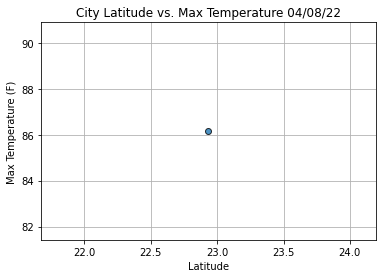

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

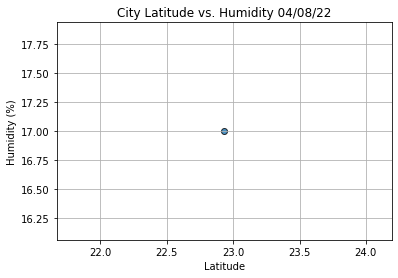

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

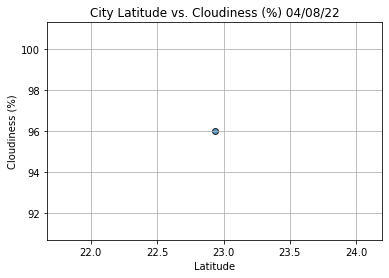

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

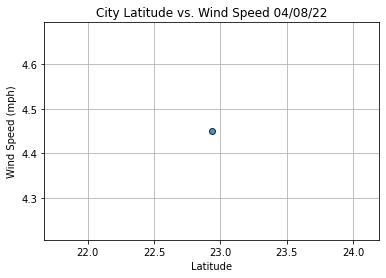

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()